<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_4_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.759225,90.134692,97.854178,49926.055583,50200.803679,-9217.734100,59418.537779
1,0.0,1.0,45.663213,73.383827,51.221360,19917.944686,20098.213087,2286.056851,17812.156236
2,0.0,2.0,98.762956,71.986578,93.532224,-33789.889085,-33515.607326,-10027.264742,-23488.342584
3,0.0,3.0,80.619109,68.889236,78.599740,16001.769469,16239.877554,-5563.723741,21803.601295
4,0.0,4.0,57.051402,24.055053,25.995550,-135.848294,-18.746289,7476.938019,-7495.684308
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,57.982075,24.192152,85.783019,-615.047908,-437.090662,2064.047643,-2501.138305
249996,999.0,246.0,44.364121,54.289625,20.753167,-315.616263,-186.209350,-968.324731,782.115381
249997,999.0,247.0,61.824957,29.665486,37.036830,-6285.286401,-6146.759128,691.074601,-6837.833729
249998,999.0,248.0,87.963761,85.903758,80.096823,-12648.670846,-12384.706505,-2867.352390,-9517.354114


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.759225,90.134692,97.854178,49926.055583,50200.803679,-9217.734100,59418.537779
1,0.0,1.0,45.663213,73.383827,51.221360,19917.944686,20098.213087,2286.056851,17812.156236
2,0.0,2.0,98.762956,71.986578,93.532224,-33789.889085,-33515.607326,-10027.264742,-23488.342584
3,0.0,3.0,80.619109,68.889236,78.599740,16001.769469,16239.877554,-5563.723741,21803.601295
4,0.0,4.0,57.051402,24.055053,25.995550,-135.848294,-18.746289,7476.938019,-7495.684308
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,57.982075,24.192152,85.783019,-615.047908,-437.090662,2064.047643,-2501.138305
249996,999.0,246.0,44.364121,54.289625,20.753167,-315.616263,-186.209350,-968.324731,782.115381
249997,999.0,247.0,61.824957,29.665486,37.036830,-6285.286401,-6146.759128,691.074601,-6837.833729
249998,999.0,248.0,87.963761,85.903758,80.096823,-12648.670846,-12384.706505,-2867.352390,-9517.354114


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    76.759225  90.134692  ...  -9217.734100  59418.537779
      1.0    45.663213  73.383827  ...   2286.056851  17812.156236
      2.0    98.762956  71.986578  ... -10027.264742 -23488.342584
      3.0    80.619109  68.889236  ...  -5563.723741  21803.601295
      4.0    57.051402  24.055053  ...   7476.938019  -7495.684308
...                ...        ...  ...           ...           ...
999.0 245.0  57.982075  24.192152  ...   2064.047643  -2501.138305
      246.0  44.364121  54.289625  ...   -968.324731    782.115381
      247.0  61.824957  29.665486  ...    691.074601  -6837.833729
      248.0  87.963761  85.903758  ...  -2867.352390  -9517.354114
      249.0  83.100072  49.566902  ...  -1169.030506   -779.345253

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    76.759225  90.134692  ...  -9217.734100  59418.537779
      1.0    45.663213  73.383827  ...   2286.056851  17812.156236
      2.0    98.762956  71.986578  ... -10027.264742 -23488.342584
      3.0    80.619109  68.889236  ...  -5563.723741  21803.601295
      4.0    57.051402  24.055053  ...   7476.938019  -7495.684308
...                ...        ...  ...           ...           ...
999.0 245.0  57.982075  24.192152  ...   2064.047643  -2501.138305
      246.0  44.364121  54.289625  ...   -968.324731    782.115381
      247.0  61.824957  29.665486  ...    691.074601  -6837.833729
      248.0  87.963761  85.903758  ...  -2867.352390  -9517.354114
      249.0  83.100072  49.566902  ...  -1169.030506   -779.345253

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.759225,90.134692,97.854178,49926.055583,50200.803679,-9217.734100,59418.537779
1,0.0,1.0,45.663213,73.383827,51.221360,19917.944686,20098.213087,2286.056851,17812.156236
2,0.0,2.0,98.762956,71.986578,93.532224,-33789.889085,-33515.607326,-10027.264742,-23488.342584
3,0.0,3.0,80.619109,68.889236,78.599740,16001.769469,16239.877554,-5563.723741,21803.601295
4,0.0,4.0,57.051402,24.055053,25.995550,-135.848294,-18.746289,7476.938019,-7495.684308
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,57.982075,24.192152,85.783019,-615.047908,-437.090662,2064.047643,-2501.138305
249996,999.0,246.0,44.364121,54.289625,20.753167,-315.616263,-186.209350,-968.324731,782.115381
249997,999.0,247.0,61.824957,29.665486,37.036830,-6285.286401,-6146.759128,691.074601,-6837.833729
249998,999.0,248.0,87.963761,85.903758,80.096823,-12648.670846,-12384.706505,-2867.352390,-9517.354114


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    76.759225  90.134692  ...  -9217.734100  59418.537779
      1.0    45.663213  73.383827  ...   2286.056851  17812.156236
      2.0    98.762956  71.986578  ... -10027.264742 -23488.342584
      3.0    80.619109  68.889236  ...  -5563.723741  21803.601295
      4.0    57.051402  24.055053  ...   7476.938019  -7495.684308
...                ...        ...  ...           ...           ...
999.0 245.0  57.982075  24.192152  ...   2064.047643  -2501.138305
      246.0  44.364121  54.289625  ...   -968.324731    782.115381
      247.0  61.824957  29.665486  ...    691.074601  -6837.833729
      248.0  87.963761  85.903758  ...  -2867.352390  -9517.354114
      249.0  83.100072  49.566902  ...  -1169.030506   -779.345253

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

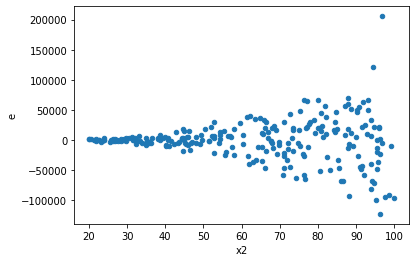

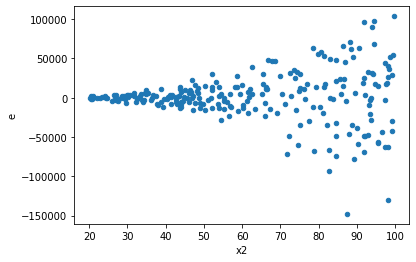

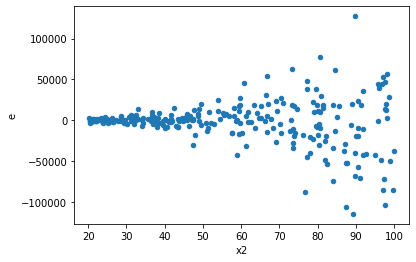

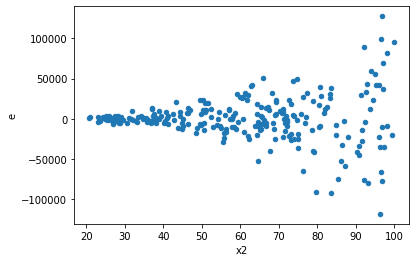

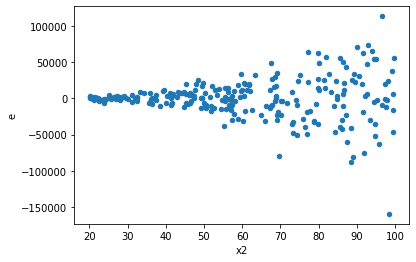

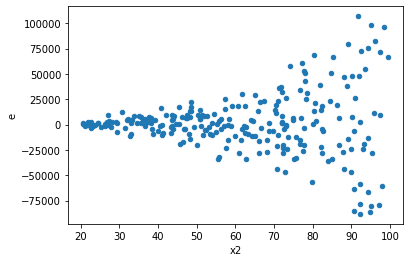

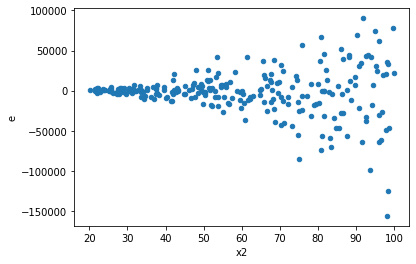

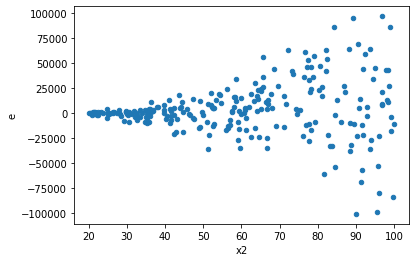

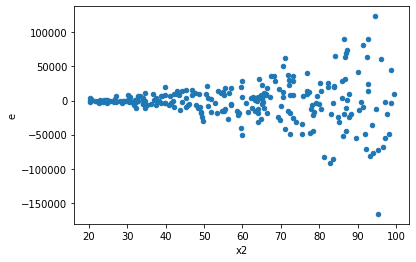

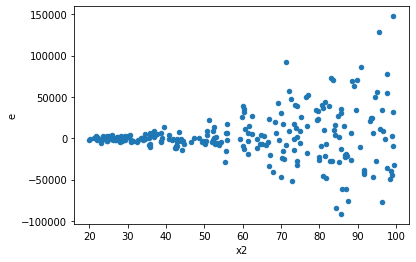

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,241609271114.53165,4972781455.23193,2516763240.7763715,51799806.825332604,48.58634413952202,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,234465218950.443,4351646626.2907,2442346030.7337813,45329652.35719479,53.87965501010794,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,172195918222.13297,2719722197.7035713,1793707481.4805517,28330439.5594122,63.31378931551485,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,177887821779.41025,5606598679.325626,1852998143.5355234,58402069.57630861,31.728295880240704,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,168758377556.87042,5596014268.472038,1757899766.2174003,58291815.296583734,30.156888360284505,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,196357955651.40475,5847007788.668025,2045395371.3687994,60906331.1319586,33.58263965920524,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,184774644544.11862,4189639012.3723106,1924735880.6679022,43642073.0455449,44.10276016584378,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,162272161637.39966,5477897005.980831,1690335017.0562465,57061427.14563366,29.623076421522537,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,189368223348.18497,6637387779.306902,1972585659.8769267,69139456.0344469,28.530534849654273,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,241609271114.53165,4972781455.23193,2516763240.7763715,51799806.825332604,48.58634413952202,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,234465218950.443,4351646626.2907,2442346030.7337813,45329652.35719479,53.87965501010794,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,172195918222.13297,2719722197.7035713,1793707481.4805517,28330439.5594122,63.31378931551485,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,177887821779.41025,5606598679.325626,1852998143.5355234,58402069.57630861,31.728295880240704,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,168758377556.87042,5596014268.472038,1757899766.2174003,58291815.296583734,30.156888360284505,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,196357955651.40475,5847007788.668025,2045395371.3687994,60906331.1319586,33.58263965920524,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,184774644544.11862,4189639012.3723106,1924735880.6679022,43642073.0455449,44.10276016584378,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,162272161637.39966,5477897005.980831,1690335017.0562465,57061427.14563366,29.623076421522537,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,189368223348.18497,6637387779.306902,1972585659.8769267,69139456.0344469,28.530534849654273,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64